Download and Process Files

In [1]:
%%bash
[[ -f peaks1.bed ]] || wget http://mitra.stanford.edu/kundaje/eileenli/SRR5179199.1x36mers.unique.MACS-2.1.0.shift75_extsize150_peaks.narrowPeak -O peaks1.bed
[[ -f peaks2.bed ]] || wget http://mitra.stanford.edu/kundaje/eileenli/SRR5179200.1x36mers.unique.MACS-2.1.0.shift75_extsize150_peaks.narrowPeak -O peaks2.bed

cat peaks1.bed peaks2.bed > peaks.bed
  
[[ -f peaks.bed.gz ]] || gzip peaks.bed
  
#Get hg38 fasta by download 2bit and then converting to fa
[[ -f sacCer3.2bit ]] || wget http://hgdownload.cse.ucsc.edu/goldenPath/sacCer3/bigZips/sacCer3.2bit -O sacCer3.2bit  

In [2]:
%%bash
[[ -f sacCer3.chrom.sizes ]] || wget http://hgdownload.cse.ucsc.edu/goldenPath/sacCer3/bigZips/sacCer3.chrom.sizes -O sacCer3.chrom.sizes

--2020-03-08 16:38:37--  http://hgdownload.cse.ucsc.edu/goldenPath/sacCer3/bigZips/sacCer3.chrom.sizes
Resolving hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229 [text/plain]
Saving to: ‘sacCer3.chrom.sizes’

     0K                                                       100% 15.4M=0s

2020-03-08 16:38:37 (15.4 MB/s) - ‘sacCer3.chrom.sizes’ saved [229/229]



In [3]:
!wget http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/bedGraphToBigWig -O bedGraphToBigWig
!chmod a+x bedGraphToBigWig

--2020-03-08 16:38:41--  http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/bedGraphToBigWig
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5206312 (5.0M) [text/plain]
Saving to: ‘bedGraphToBigWig’

bedGraphToBigWig    100%[===================>]   4.96M   769KB/s    in 6.1s    

2020-03-08 16:38:47 (833 KB/s) - ‘bedGraphToBigWig’ saved [5206312/5206312]



In [4]:
!wget http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/bigWigMerge -O bigWigMerge
!chmod a+x bigWigMerge

--2020-03-08 16:38:47--  http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/bigWigMerge
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5215616 (5.0M) [text/plain]
Saving to: ‘bigWigMerge’

bigWigMerge         100%[===================>]   4.97M  6.35MB/s    in 0.8s    

2020-03-08 16:38:48 (6.35 MB/s) - ‘bigWigMerge’ saved [5215616/5215616]



In [5]:
%%bash
[[ -f twoBitToFa ]] || wget http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/twoBitToFa -O twoBitToFa
chmod a+x twoBitToFa

--2020-03-08 16:39:35--  http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/twoBitToFa
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5923232 (5.6M) [text/plain]
Saving to: ‘twoBitToFa’

     0K .......... .......... .......... .......... ..........  0% 2.60M 2s
    50K .......... .......... .......... .......... ..........  1% 2.60M 2s
   100K .......... .......... .......... .......... ..........  2% 5.25M 2s
   150K .......... .......... .......... .......... ..........  3% 68.4M 1s
   200K .......... .......... .......... .......... ..........  4% 5.36M 1s
   250K .......... .......... .......... .......... ..........  5% 5.44M 1s
   300K .......... .......... .......... .......... ..........  6% 69.6M 1s
   350K .......... .......... .......... .......... ..........  6% 60.8M 1s
   400K .........

In [6]:
%%bash
[[ -f sacCer3.genome.fa ]] || ./twoBitToFa sacCer3.2bit sacCer3.genome.fa

In [7]:
%%bash
[[ -f pos_strand1.bw ]] || wget http://mitra.stanford.edu/kundaje/eileenli/SRR5179199.1x36mers.unique.5p.counts.plus.bigWig -O pos_strand1.bw
[[ -f neg_strand1.bw ]] || wget http://mitra.stanford.edu/kundaje/eileenli/SRR5179199.1x36mers.unique.5p.counts.minus.bigWig -O neg_strand1.bw

[[ -f pos_strand2.bw ]] || wget http://mitra.stanford.edu/kundaje/eileenli/SRR5179200.1x36mers.unique.5p.counts.plus.bigWig -O pos_strand2.bw
[[ -f neg_strand2.bw ]] || wget http://mitra.stanford.edu/kundaje/eileenli/SRR5179200.1x36mers.unique.5p.counts.minus.bigWig -O neg_strand2.bw
  
[[ -f control_pos_strand.bw ]] || wget http://mitra.stanford.edu/kundaje/eileenli/SRR5179234.1x36mers.unique.5p.counts.plus.bigWig -O control_pos_strand.bw
[[ -f control_neg_strand.bw ]] || wget http://mitra.stanford.edu/kundaje/eileenli/SRR5179234.1x36mers.unique.5p.counts.minus.bigWig -O control_neg_strand.bw

--2020-03-08 16:40:56--  http://mitra.stanford.edu/kundaje/eileenli/SRR5179199.1x36mers.unique.5p.counts.plus.bigWig
Resolving mitra.stanford.edu (mitra.stanford.edu)... 171.67.96.243
Connecting to mitra.stanford.edu (mitra.stanford.edu)|171.67.96.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1026733 (1003K)
Saving to: ‘pos_strand1.bw’

     0K .......... .......... .......... .......... ..........  4% 39.7M 0s
    50K .......... .......... .......... .......... ..........  9% 30.2M 0s
   100K .......... .......... .......... .......... .......... 14% 37.5M 0s
   150K .......... .......... .......... .......... .......... 19% 39.0M 0s
   200K .......... .......... .......... .......... .......... 24% 35.9M 0s
   250K .......... .......... .......... .......... .......... 29% 41.9M 0s
   300K .......... .......... .......... .......... .......... 34% 28.5M 0s
   350K .......... .......... .......... .......... .......... 39% 33.6M 0s
   400K .......... ...

In [8]:
%%bash
[[ -e sacCer3.genome.fa.fai ]] || samtools faidx sacCer3.genome.fa

In [10]:
%%bash
#get 1kb around summits
[[ -f 1000_around_summits.bed.gz ]] || zcat peaks.bed.gz | perl -lane 'print $F[0]."\t".(($F[1]+$F[9]))."\t".(($F[1]+$F[9]))' | bedtools slop -g sacCer3.chrom.sizes -b 500 | perl -lane 'if ($F[2]-$F[1]==1000) {print $F[0]."\t".$F[1]."\t".$F[2]."\t1"}' | sortBed | gzip -c > 1000_around_summits.bed.gz
#split into train, valid, test sets
[[ -f test_1000_around_summits.bed.gz ]] || zcat 1000_around_summits.bed.gz | egrep -w 'chrX|chrXI' | gzip -c > test_1000_around_summits.bed.gz
[[ -f valid_1000_around_summits.bed.gz ]] || zcat 1000_around_summits.bed.gz | egrep -w 'chrXIV|chrVIII' | gzip -c > valid_1000_around_summits.bed.gz
[[ -f train_1000_around_summits.bed.gz ]] || zcat 1000_around_summits.bed.gz | egrep -w -v 'chrX|chrXI|chrXIV|chrVIII' | gzip -c > train_1000_around_summits.bed.gz

In [11]:
%%bash
[[ -f positive_strand.bedGraph ]] || ./bigWigMerge pos_strand1.bw pos_strand2.bw positive_strand.bedGraph

Got 17 chromosomes from 2 bigWigs
Processing


In [12]:
%%bash
[[ -f pos_strand.bw ]] || ./bedGraphToBigWig positive_strand.bedGraph sacCer3.chrom.sizes pos_strand.bw

In [13]:
!touch  neg_strand.bw
import pyBigWig
from itertools import *

def customSort(val):
      chrom_number = "".join(takewhile(str.isalpha,val[0]))
      start = val[0].replace(chrom_number,"")
      return int(start)

# Data loader that accepts multiple replicates and adds them together
    
class DataLoader(object):
    
    def __init__(self, replicates):
        """
        Args:
            replicates (list of bigwig files)
        """
        self.replicates = replicates
    
    def merge(self):
      bigWigs = []
      # bw_pos1.chroms() - remember to save the chromosomes dict into a variable
      # num_chroms = 16 # don't need this anymore b/c length of chromosomes dict
      
      # opening bw files.
      for idx in range(len(self.replicates)):
        bigWigs.append(pyBigWig.open(self.replicates[idx]))
        
      chrms = ["chrI","chrII","chrIII","chrIV","chrV","chrVI","chrVII","chrVIII",
               "chrIX","chrX","chrXI","chrXII","chrXIII","chrXIV","chrXV","chrXVI","chrM"]
        
      # retrieve values. save to new array, then save that to new bw file.
      combined_dict = {}
      for c in chrms:
        for j in range(len(bigWigs)):
          intervals = bigWigs[j].intervals(c)
          for i in intervals:
            start = i[0]
            end = i[1]
            val = i[2]
            for k in range(start,end):
              if (c+str(start)) in combined_dict:
                combined_dict[c+str(start)]+=val
              else:
                combined_dict[c+str(start)]=val
      
      # sort combined_dict
      # SORT EACH CHROMOSOME AT A TIME, THEN ADD TO DICTIONARY
      sorted_dict = {}
      flag = True
      chrom_list = []
      prev_chrom_num = ""

      for key in combined_dict:
        chrom_number = "".join(takewhile(str.isalpha,key))
        if (flag or chrom_number==prev_chrom_num):
          chrom_list.append((key,combined_dict[key]))
        else:
          chrom_list.sort(key=customSort)
          # append to new dictionary
          # code here:
          for entry in chrom_list:
            sorted_dict[entry[0]]=entry[1]
          chrom_list = []
          chrom_list.append((key,combined_dict[key]))
        flag = False
        prev_chrom_num=chrom_number
   
      
      # sorted_dict format
      """
      Key: chrom number + start, ex: "chrI324"
      Value: the sum of the values in the bigwig files
      """
      return sorted_dict 
    
    def getChromNums(self):
      # get an ordered list of the chromosome numbers
      ch_num = []
      for key in self.merge():
          chrom_number = "".join(takewhile(str.isalpha,key))
          ch_num.append(chrom_number)
      return np.array(ch_num)
    
    def getChromStart(self):
      # get an ordered list of the chromosome start positions
      ch_start = []
      for key in self.merge():
        chrom_number = "".join(takewhile(str.isalpha,key))
        start = key.replace(chrom_number,"")
        ch_start.append(int(start))
      return np.array(ch_start)
    
    def getChromEnd(self):
      # get an ordered list of the chromosome end positions. 1 base pair long so end pos is 1 more than start.
      ch_end = []
      for entry in self.getChromStart():
        ch_end.append(entry+1)
      return np.array(ch_end)
    
    def getChromVals(self):
      # get an ordered list of the chromosome values.
      ch_vals = []
      vals_dict = self.merge() 
      for key in vals_dict:
        ch_vals.append(vals_dict[key])
      return np.array(ch_vals)

import pyBigWig
data_loader = DataLoader(["neg_strand1.bw","neg_strand2.bw"])
data_loader.merge();

neg_bw = pyBigWig.open("neg_strand.bw","w")

neg_bw.addHeader([("chrI",230218),("chrII",813184),("chrIII",316620),("chrIV",1531933),("chrV",576874),("chrVI",270161),("chrVII",1090940),("chrVIII",562643),("chrIX",439888),("chrX",745751),("chrXI",666816),("chrXII",1078177),("chrXIII",924431),("chrXIV",784333),("chrXV",1091291),("chrXVI",948066),("chrM",85779)])
import numpy as np
neg_bw.addEntries(data_loader.getChromNums(),data_loader.getChromStart(),ends=data_loader.getChromEnd(),values=data_loader.getChromVals())
neg_bw.close()

Train Model

In [1]:
from seqdataloader.batchproducers import coordbased
from seqdataloader.batchproducers.coordbased import coordstovals
from seqdataloader.batchproducers.coordbased import coordbatchproducers
from seqdataloader.batchproducers.coordbased import coordbatchtransformers

Using TensorFlow backend.
/users/amr1/miniconda3/envs/basepair/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/amr1/miniconda3/envs/basepair/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/amr1/miniconda3/envs/basepair/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/users/amr1/mi

In [5]:
import numpy as np
import gzip
import keras
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import keras_genomics
from keras_genomics.layers.convolutional import RevCompConv1D
import keras
import keras.layers as kl
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
from seqdataloader.batchproducers import coordbased
from seqdataloader.batchproducers.coordbased import coordstovals
from seqdataloader.batchproducers.coordbased import coordbatchproducers
from seqdataloader.batchproducers.coordbased import coordbatchtransformers

def multinomial_nll(true_counts, logits):
    """Compute the multinomial negative log-likelihood
    Args:
      true_counts: observed count values
      logits: predicted logit values
    """
    counts_per_example = tf.reduce_sum(true_counts, axis=-1)
    dist = tfp.distributions.Multinomial(total_count=counts_per_example,
                                         logits=logits)
    return (-tf.reduce_sum(dist.log_prob(true_counts)) / 
            tf.to_float(tf.shape(true_counts)[0]))


#from https://github.com/kundajelab/basepair/blob/cda0875571066343cdf90aed031f7c51714d991a/basepair/losses.py#L87
class MultichannelMultinomialNLL(object):
    def __init__(self, n):
        self.__name__ = "MultichannelMultinomialNLL"
        self.n = n

    def __call__(self, true_counts, logits):
        for i in range(self.n):
            loss = multinomial_nll(true_counts[..., i], logits[..., i])
            if i == 0:
                total = loss
            else:
                total += loss
        return total

    def get_config(self):
        return {"n": self.n}

#If we want to avoid zero-padding, then the input seq len will be determined
# by parameters of the convolutions
class AbstractProfileModel(object):

    def get_output_profile_len(self):
        raise NotImplementedError()

    def get_model(self):
        raise NotImplementedError()

def trim_flanks_of_conv_layer(conv_layer, output_len, width_to_trim, filters):
    layer = keras.layers.Lambda(
        lambda x: x[:,
          int(0.5*(width_to_trim)):-(width_to_trim-int(0.5*(width_to_trim)))],
        output_shape=(output_len, filters))(conv_layer)
    return layer

#model architecture is based on 
#https://github.com/kundajelab/basepair/blob/cda0875571066343cdf90aed031f7c51714d991a/basepair/models.py#L534
#The non-cli parameters are specified in:
# https://github.com/kundajelab/basepair/blob/cda0875571066343cdf90aed031f7c51714d991a/src/chipnexus/train/seqmodel/joint-model-valid.gin
#The cli parameters are in line 165 of:
# https://docs.google.com/spreadsheets/d/1n3l2HXKSNpmNUOifD41uRzDEAgmOqXMQDxquRaz6WLg/edit#gid=0
# which seems to match https://github.com/kundajelab/basepair/blob/cda0875571066343cdf90aed031f7c51714d991a/src/chipnexus/train/seqmodel/ChIP-seq-default.gin
class RcBPnetArch(AbstractProfileModel):   

    def __init__(self, input_seq_len, c_task_weight, filters,
                       n_dil_layers, conv1_kernel_size,
                       dil_kernel_size,
                       outconv_kernel_size, lr):
        self.input_seq_len = input_seq_len
        self.c_task_weight = c_task_weight
        self.filters = filters
        self.n_dil_layers = n_dil_layers
        self.conv1_kernel_size = conv1_kernel_size
        self.dil_kernel_size = dil_kernel_size
        self.outconv_kernel_size = outconv_kernel_size
        self.lr = lr

    def get_embedding_len(self):
        embedding_len = self.input_seq_len
        embedding_len -= (self.conv1_kernel_size-1)     
        for i in range(1, self.n_dil_layers+1):
            dilation_rate = (2**i)
            embedding_len -= dilation_rate*(self.dil_kernel_size-1)
        return embedding_len

    def get_output_profile_len(self):
        embedding_len = self.get_embedding_len()
        out_profile_len = embedding_len - (self.outconv_kernel_size - 1)
        return out_profile_len

    def get_keras_model(self):

        out_pred_len = self.get_output_profile_len()

        inp = kl.Input(shape=(self.input_seq_len, 4), name='sequence')
        first_conv = RevCompConv1D(filters=self.filters,
                               kernel_size=self.conv1_kernel_size,
                               padding='valid',
                               activation='relu')(inp)
        curr_layer_size = self.input_seq_len - (self.conv1_kernel_size-1)
        bias_counts_input = kl.Input(shape=(1,), name="control_logcount")
        bias_profile_input = kl.Input(shape=(out_pred_len, 2),
                                      name="control_profile")
        prev_layers = [first_conv]
        for i in range(1, self.n_dil_layers + 1):
          dilation_rate = 2**i
          if i == 1:
              prev_sum = first_conv
          else:
              print(prev_layers)
              prev_sum = kl.merge.Average()(prev_layers)
          conv_output = RevCompConv1D(filters=self.filters,
                                  kernel_size=self.dil_kernel_size,
                                  padding='valid',
                                  activation='relu',
                                  dilation_rate=dilation_rate)(prev_sum)          
          width_to_trim = dilation_rate*(self.dil_kernel_size-1)
          curr_layer_size = (curr_layer_size - width_to_trim)
          prev_layers = [trim_flanks_of_conv_layer(
              conv_layer=x, output_len=curr_layer_size,
              width_to_trim=width_to_trim, filters=2*self.filters)
              for x in prev_layers]
          prev_layers.append(conv_output)

        combined_conv = kl.merge.Average()(prev_layers)

        #Counts prediction
        gap_combined_conv = kl.GlobalAvgPool1D()(combined_conv)
        count_out = kl.Reshape((-1,), name="task0_logcount")(
            RevCompConv1D(filters=1, kernel_size=1)(
              kl.Reshape((1,-1))(kl.concatenate([
                  #concatenation of the bias layer both before and after
                  # is needed for rc symmetry
                  kl.Lambda(lambda x: x[:, ::-1])(bias_counts_input),
                  gap_combined_conv,
                  bias_counts_input], axis=-1))))

        profile_out_prebias = RevCompConv1D(
                               filters=1,
                               kernel_size=self.outconv_kernel_size,
                               padding='valid')(combined_conv)
        profile_out = RevCompConv1D(
            filters=1, kernel_size=1, name="task0_profile")(
                    kl.concatenate([
                        #concatenation of the bias layer both before and after
                        # is needed for rc symmetry
                        kl.Lambda(lambda x: x[:, :, ::-1])(bias_profile_input),
                        profile_out_prebias,
                        bias_profile_input], axis=-1))

        model = keras.models.Model(
          inputs=[inp, bias_counts_input, bias_profile_input],
          outputs=[count_out, profile_out])
        model.compile(keras.optimizers.Adam(lr=self.lr),
                      loss=['mse', MultichannelMultinomialNLL(2)],
                      loss_weights=[self.c_task_weight, 1])
        return model

In [6]:
seq_len = 546 # remember to update

modelwrapper = RcBPnetArch(
    input_seq_len=seq_len, c_task_weight=100,
    filters=64, n_dil_layers=6,
    conv1_kernel_size=21,
    dil_kernel_size=3,
    outconv_kernel_size=75,
    lr=0.001)
out_pred_len = modelwrapper.get_output_profile_len()
print(out_pred_len, seq_len-out_pred_len)

200 346


In [7]:
pos_neg_smooth_log_counts =\
  coordstovals.bigwig.PosAndNegSmoothWindowCollapsedLogCounts(
        pos_strand_bigwig_path="control_pos_strand.bw",
        neg_strand_bigwig_path="control_neg_strand.bw",
        counts_mode_name="control_logcount",
        profile_mode_name="control_profile",
        center_size_to_use=out_pred_len,
        smoothing_windows=[1,50])
inputs_coordstovals = coordstovals.core.CoordsToValsJoiner(
    coordstovals_list=[
      coordbased.coordstovals.fasta.PyfaidxCoordsToVals(
        genome_fasta_path="sacCer3.genome.fa",
        mode_name="sequence",
        center_size_to_use=seq_len),
      pos_neg_smooth_log_counts])

targets_coordstovals = coordstovals.bigwig.PosAndNegSeparateLogCounts(
    pos_strand_bigwig_path="pos_strand.bw",
    neg_strand_bigwig_path="neg_strand.bw",
    counts_mode_name="task0_logcount",
    profile_mode_name="task0_profile",
    center_size_to_use=out_pred_len)

keras_train_batch_generator = coordbased.core.KerasBatchGenerator(
  coordsbatch_producer=coordbatchproducers.SimpleCoordsBatchProducer(
      bed_file="train_1000_around_summits.bed.gz",
      coord_batch_transformer=
          coordbatchtransformers.ReverseComplementAugmenter().chain(
          coordbatchtransformers.UniformJitter(
              maxshift=200, chromsizes_file="sacCer3.chrom.sizes")),
      batch_size=64,
      shuffle_before_epoch=True, 
      seed=1234),
  inputs_coordstovals=inputs_coordstovals,
  targets_coordstovals=targets_coordstovals)

keras_valid_batch_generator = coordbased.core.KerasBatchGenerator(
  coordsbatch_producer=coordbatchproducers.SimpleCoordsBatchProducer(
            bed_file="valid_1000_around_summits.bed.gz",
            batch_size=64,
            shuffle_before_epoch=False, 
            seed=1234),
  inputs_coordstovals=inputs_coordstovals,
  targets_coordstovals=targets_coordstovals)

thebatch = keras_train_batch_generator[0]
for tupleidx,tupleentry in enumerate(thebatch):
  print("Tuple entry",tupleidx)
  for key in tupleentry:
    print(key, tupleentry[key].shape)

Heads up: coordinates in bed file are assumed to be on the positive strand; if strand in the bed file is improtant to you, please add that feature to SimpleCoordsBatchProducer
Heads up: coordinates in bed file are assumed to be on the positive strand; if strand in the bed file is improtant to you, please add that feature to SimpleCoordsBatchProducer
Tuple entry 0
sequence (128, 546, 4)
control_logcount (128,)
control_profile (128, 200, 2)
Tuple entry 1
task0_logcount (128, 2)
task0_profile (128, 200, 2)


In [5]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,3"

model = modelwrapper.get_keras_model()
print(model.summary())
early_stopping_callback = keras.callbacks.EarlyStopping(
                          patience=10, restore_best_weights=True)
loss_history = model.fit_generator(keras_train_batch_generator,
                  epochs=200,
                  validation_data=keras_valid_batch_generator,
                  callbacks=[early_stopping_callback])
model.set_weights(early_stopping_callback.best_weights)




[<tf.Tensor 'lambda_1/strided_slice:0' shape=(?, 522, 128) dtype=float32>, <tf.Tensor 'rev_comp_conv1d_2/Relu:0' shape=(?, 522, 128) dtype=float32>]
[<tf.Tensor 'lambda_2/strided_slice:0' shape=(?, 514, 128) dtype=float32>, <tf.Tensor 'lambda_3/strided_slice:0' shape=(?, 514, 128) dtype=float32>, <tf.Tensor 'rev_comp_conv1d_3/Relu:0' shape=(?, 514, 128) dtype=float32>]
[<tf.Tensor 'lambda_4/strided_slice:0' shape=(?, 498, 128) dtype=float32>, <tf.Tensor 'lambda_5/strided_slice:0' shape=(?, 498, 128) dtype=float32>, <tf.Tensor 'lambda_6/strided_slice:0' shape=(?, 498, 128) dtype=float32>, <tf.Tensor 'rev_comp_conv1d_4/Relu:0' shape=(?, 498, 128) dtype=float32>]
[<tf.Tensor 'lambda_7/strided_slice:0' shape=(?, 466, 128) dtype=float32>, <tf.Tensor 'lambda_8/strided_slice:0' shape=(?, 466, 128) dtype=float32>, <tf.Tensor 'lambda_9/strided_slice:0' shape=(?, 466, 128) dtype=float32>, <tf.Tensor 'lambda_10/strided_slice:0' shape=(?, 466, 128) dtype=float32>, <tf.Tensor 'rev_comp_conv1d_5/

In [6]:
from keras.models import load_model
model.save('my_model.h5')

evaluate

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
from keras.utils import CustomObjectScope

with CustomObjectScope({'MultichannelMultinomialNLL': MultichannelMultinomialNLL,'RevCompConv1D': RevCompConv1D}):
  model = load_model('my_model.h5')

Using TensorFlow backend.
/users/amr1/miniconda3/envs/basepair/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/amr1/miniconda3/envs/basepair/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/amr1/miniconda3/envs/basepair/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/users/amr1/mi







Instructions for updating:
Use `tf.cast` instead.


Heads up: coordinates in bed file are assumed to be on the positive strand; if strand in the bed file is improtant to you, please add that feature to SimpleCoordsBatchProducer


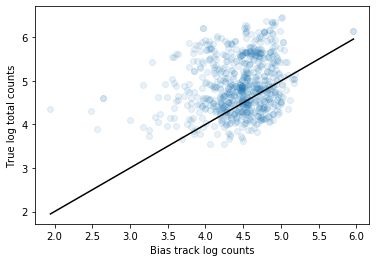

SpearmanrResult(correlation=0.19175203753687126, pvalue=2.0836928871357443e-07)


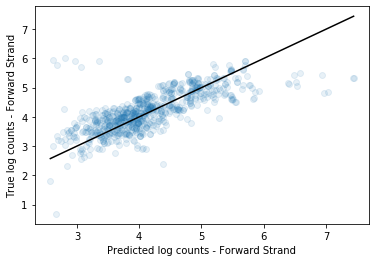

SpearmanrResult(correlation=0.7632650984975246, pvalue=9.97199791716414e-139)


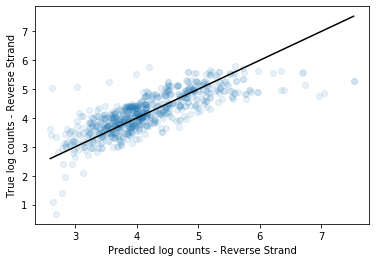

SpearmanrResult(correlation=0.8180923165691765, pvalue=3.699430265867015e-175)


In [7]:
o_test_preds_logcount = []
o_test_biastrack_logcount = []
o_test_biastrack_profile = []
o_test_seqs = []
o_test_preds_profile = []
o_test_labels_logcount = []
o_test_labels_profile = []

keras_test_batch_generator = coordbased.core.KerasBatchGenerator(
  coordsbatch_producer=coordbatchproducers.SimpleCoordsBatchProducer(
            bed_file="test_1000_around_summits.bed.gz",
            #bed_file="test_1000_around_pho4.bed.gz",
            batch_size=64,
            shuffle_before_epoch=False, 
            seed=1234),
  inputs_coordstovals=inputs_coordstovals,
  targets_coordstovals=targets_coordstovals)

orig_seqs = []

for batch_idx in range(len(keras_test_batch_generator)):
    batch_inputs, batch_labels = keras_test_batch_generator[batch_idx]
    o_test_seqs.append(batch_inputs['sequence']) 
    o_test_biastrack_logcount.append(batch_inputs['control_logcount'])
    o_test_biastrack_profile.append(batch_inputs['control_profile'])
    
    #orig_seqs.append(convertToString(batch_inputs['sequence']))
    
    test_preds = model.predict(batch_inputs)
    o_test_preds_logcount.append(test_preds[0])
    o_test_preds_profile.append(test_preds[1])
    o_test_labels_logcount.append(batch_labels['task0_logcount'])
    o_test_labels_profile.append(batch_labels['task0_profile'])
o_test_biastrack_logcount = np.concatenate(o_test_biastrack_logcount, axis=0)
o_test_biastrack_profile = np.concatenate(o_test_biastrack_profile,axis=0)
o_test_seqs = np.concatenate(o_test_seqs,axis=0)
o_test_preds_logcount = np.concatenate(o_test_preds_logcount, axis=0)
o_test_preds_profile = np.concatenate(o_test_preds_profile, axis=0)
o_test_labels_logcount = np.concatenate(o_test_labels_logcount, axis=0)
o_test_labels_profile = np.concatenate(o_test_labels_profile, axis=0)

from matplotlib import pyplot as plt
from scipy.stats import spearmanr

o_test_labels_logtotalcount = np.log(np.sum(np.exp(o_test_labels_logcount) - 1,axis=-1) + 1)

plt.scatter(o_test_biastrack_logcount, o_test_labels_logtotalcount, alpha=0.1)
plt.xlabel("Bias track log counts")
plt.ylabel("True log total counts")
plt.plot([np.min(o_test_biastrack_logcount), np.max(o_test_biastrack_logcount)],
         [np.min(o_test_biastrack_logcount), np.max(o_test_biastrack_logcount)],
         color="black")
plt.show()
print(spearmanr(o_test_biastrack_logcount, o_test_labels_logtotalcount))


#do a scatterplot of total count predictions
plt.scatter(o_test_preds_logcount[:,0], o_test_labels_logcount[:,0], alpha=0.1)
plt.xlabel("Predicted log counts - Forward Strand")
plt.ylabel("True log counts - Forward Strand")
plt.plot([np.min(o_test_preds_logcount[:,0]), np.max(o_test_preds_logcount[:,0])],
         [np.min(o_test_preds_logcount[:,0]), np.max(o_test_preds_logcount[:,0])],
         color="black")
plt.show()
print(spearmanr(o_test_preds_logcount[:,0], o_test_labels_logcount[:,0]))

plt.scatter(o_test_preds_logcount[:,1], o_test_labels_logcount[:,1], alpha=0.1)
plt.xlabel("Predicted log counts - Reverse Strand")
plt.ylabel("True log counts - Reverse Strand")
plt.plot([np.min(o_test_preds_logcount[:,1]), np.max(o_test_preds_logcount[:,1])],
         [np.min(o_test_preds_logcount[:,1]), np.max(o_test_preds_logcount[:,1])],
         color="black")
plt.show()
print(spearmanr(o_test_preds_logcount[:,1], o_test_labels_logcount[:,1]))

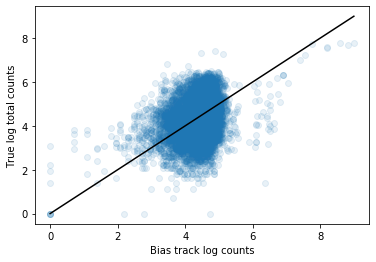

SpearmanrResult(correlation=0.22566161674071383, pvalue=8.375166393567192e-109)


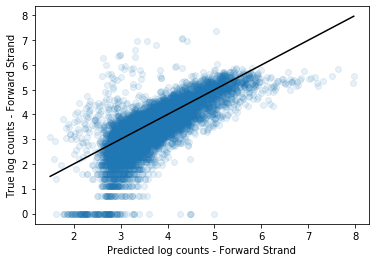

SpearmanrResult(correlation=0.7883869315039305, pvalue=0.0)


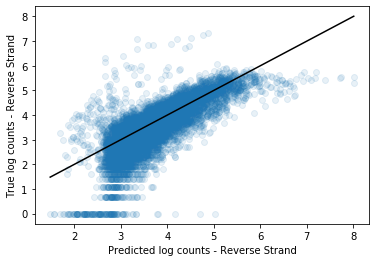

SpearmanrResult(correlation=0.7879946235566072, pvalue=0.0)


In [9]:
%matplotlib inline

o_train_preds_logcount = []
o_train_biastrack_logcount = []
o_train_biastrack_profile = []
o_train_seqs = []
o_train_preds_profile = []
o_train_labels_logcount = []
o_train_labels_profile = []

orig_seqs = []

for batch_idx in range(len(keras_train_batch_generator)):
    batch_inputs, batch_labels = keras_train_batch_generator[batch_idx]
    o_train_seqs.append(batch_inputs['sequence']) 
    o_train_biastrack_logcount.append(batch_inputs['control_logcount'])
    o_train_biastrack_profile.append(batch_inputs['control_profile'])
    
    #orig_seqs.append(convertToString(batch_inputs['sequence']))
    
    train_preds = model.predict(batch_inputs)
    o_train_preds_logcount.append(train_preds[0])
    o_train_preds_profile.append(train_preds[1])
    o_train_labels_logcount.append(batch_labels['task0_logcount'])
    o_train_labels_profile.append(batch_labels['task0_profile'])
o_train_biastrack_logcount = np.concatenate(o_train_biastrack_logcount, axis=0)
o_train_biastrack_profile = np.concatenate(o_train_biastrack_profile,axis=0)
o_train_seqs = np.concatenate(o_train_seqs,axis=0)
o_train_preds_logcount = np.concatenate(o_train_preds_logcount, axis=0)
o_train_preds_profile = np.concatenate(o_train_preds_profile, axis=0)
o_train_labels_logcount = np.concatenate(o_train_labels_logcount, axis=0)
o_train_labels_profile = np.concatenate(o_train_labels_profile, axis=0)

from matplotlib import pyplot as plt
from scipy.stats import spearmanr

o_train_labels_logtotalcount = np.log(np.sum(np.exp(o_train_labels_logcount) - 1,axis=-1) + 1)

plt.scatter(o_train_biastrack_logcount, o_train_labels_logtotalcount, alpha=0.1)
plt.xlabel("Bias track log counts")
plt.ylabel("True log total counts")
plt.plot([np.min(o_train_biastrack_logcount), np.max(o_train_biastrack_logcount)],
         [np.min(o_train_biastrack_logcount), np.max(o_train_biastrack_logcount)],
         color="black")
plt.show()
print(spearmanr(o_train_biastrack_logcount, o_train_labels_logtotalcount))


#do a scatterplot of total count predictions
plt.scatter(o_train_preds_logcount[:,0], o_train_labels_logcount[:,0], alpha=0.1)
plt.xlabel("Predicted log counts - Forward Strand")
plt.ylabel("True log counts - Forward Strand")
plt.plot([np.min(o_train_preds_logcount[:,0]), np.max(o_train_preds_logcount[:,0])],
         [np.min(o_train_preds_logcount[:,0]), np.max(o_train_preds_logcount[:,0])],
         color="black")
plt.show()
print(spearmanr(o_train_preds_logcount[:,0], o_train_labels_logcount[:,0]))

plt.scatter(o_train_preds_logcount[:,1], o_train_labels_logcount[:,1], alpha=0.1)
plt.xlabel("Predicted log counts - Reverse Strand")
plt.ylabel("True log counts - Reverse Strand")
plt.plot([np.min(o_train_preds_logcount[:,1]), np.max(o_train_preds_logcount[:,1])],
         [np.min(o_train_preds_logcount[:,1]), np.max(o_train_preds_logcount[:,1])],
         color="black")
plt.show()
print(spearmanr(o_train_preds_logcount[:,1], o_train_labels_logcount[:,1]))

Interpretation

In [8]:
import shap
from deeplift.dinuc_shuffle import dinuc_shuffle

def combine_mult_and_diffref(mult, orig_inp, bg_data):
    to_return = []
    for l in [0]:
        projected_hypothetical_contribs = np.zeros_like(bg_data[l]).astype("float")
        assert len(orig_inp[l].shape)==2
        #At each position in the input sequence, we iterate over the one-hot encoding
        # possibilities (eg: for genomic sequence, this is ACGT i.e.
        # 1000, 0100, 0010 and 0001) and compute the hypothetical 
        # difference-from-reference in each case. We then multiply the hypothetical
        # differences-from-reference with the multipliers to get the hypothetical contributions.
        #For each of the one-hot encoding possibilities,
        # the hypothetical contributions are then summed across the ACGT axis to estimate
        # the total hypothetical contribution of each position. This per-position hypothetical
        # contribution is then assigned ("projected") onto whichever base was present in the
        # hypothetical sequence.
        #The reason this is a fast estimate of what the importance scores *would* look
        # like if different bases were present in the underlying sequence is that
        # the multipliers are computed once using the original sequence, and are not
        # computed again for each hypothetical sequence.
        for i in range(orig_inp[l].shape[-1]):
            hypothetical_input = np.zeros_like(orig_inp[l]).astype("float")
            hypothetical_input[:,i] = 1.0
            hypothetical_difference_from_reference = (hypothetical_input[None,:,:]-bg_data[l])
            hypothetical_contribs = hypothetical_difference_from_reference*mult[l]
            projected_hypothetical_contribs[:,:,i] = np.sum(hypothetical_contribs,axis=-1) 
        to_return.append(np.mean(projected_hypothetical_contribs,axis=0))
    to_return.append(np.zeros_like(orig_inp[1]))
    return to_return

def shuffle_several_times(s):
    numshuffles=20
    return [np.array([dinuc_shuffle(s[0]) for i in range(numshuffles)]),
            np.array([s[1] for i in range(numshuffles)])]

profile_model_counts_explainer = shap.explainers.deep.TFDeepExplainer(
    ([model.input[0], model.input[1]],
     tf.reduce_sum(model.outputs[0],axis=-1)),
    shuffle_several_times,
    combine_mult_and_diffref=combine_mult_and_diffref)

#See Google slide deck for explanations
#We meannorm as per section titled "Adjustments for Softmax Layers"
# in the DeepLIFT paper
meannormed_logits = (
    model.outputs[1]-
    tf.reduce_mean(model.outputs[1],axis=1)[:,None,:])
#'stop_gradient' will prevent importance from being propagated through
# this operation; we do this because we just want to treat the post-softmax
# probabilities as 'weights' on the different logits, without having the
# network explain how the probabilities themselves were derived
#Could be worth contrasting explanations derived with and without stop_gradient
# enabled...
stopgrad_meannormed_logits = tf.stop_gradient(meannormed_logits)
softmax_out = tf.nn.softmax(stopgrad_meannormed_logits,axis=1)
#Weight the logits according to the softmax probabilities, take the sum for each
# example. This mirrors what was done for the bpnet paper.
weightedsum_meannormed_logits = tf.reduce_sum(softmax_out*meannormed_logits,
                                              axis=(1,2))
profile_model_profile_explainer = shap.explainers.deep.TFDeepExplainer(
    ([model.input[0], model.input[2]],
     weightedsum_meannormed_logits),
    shuffle_several_times,
    combine_mult_and_diffref=combine_mult_and_diffref)

In [9]:
#The shap scores
post_counts_hypimps,_ = profile_model_counts_explainer.shap_values(
    [o_test_seqs, np.zeros((len(o_test_seqs), 1))],
    progress_message=10)
post_profile_hypimps,_ = profile_model_profile_explainer.shap_values(
    [o_test_seqs, np.zeros((len(o_test_seqs), 200, 2))],
    progress_message=10)

post_counts_actualimps = post_counts_hypimps*o_test_seqs
post_profile_actualimps = post_profile_hypimps*o_test_seqs

Done 0 examples of 722
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Done 10 examples of 722
Done 20 examples of 722
Done 30 examples of 722
Done 40 examples of 722
Done 50 examples of 722
Done 60 examples of 722
Done 70 examples of 722
Done 80 examples of 722
Done 90 examples of 722
Done 100 examples of 722
Done 110 examples of 722
Done 120 examples of 722
Done 130 examples of 722
Done 140 examples of 722
Done 150 examples of 722
Done 160 examples of 722
Done 170 examples of 722
Done 180 examples of 722
Done 190 examples of 722
Done 200 examples of 722
Done 210 examples of 722
Done 220 examples of 722
Done 230 examples of 722
Done 240 examples of 722
Done 250 examples of 722
Done 260 examples of 722
Done 270 examples of 722
Done 280 examples of 722
Done 290 examples of 722
Done 300 examples of 722
Done 310 examples of 722
Done 320 examples of 722
Done 330 examples of 722
Done 340 examples of 722
Done 350 examples of 722
Done 360 examples

In [10]:
o_test_preds_profile.shape

(722, 200, 2)

In [11]:
o_test_seqs.shape

(722, 546, 4)

idx 240
Counts [317. 328.]
Predcounts [228.8326  269.15262]
oneovertemp 1.0
(200, 2)
Pred profile shape (200, 2)


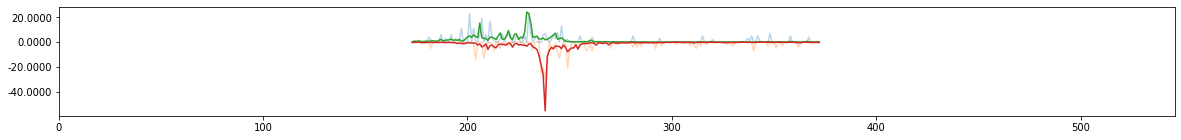

counts imp


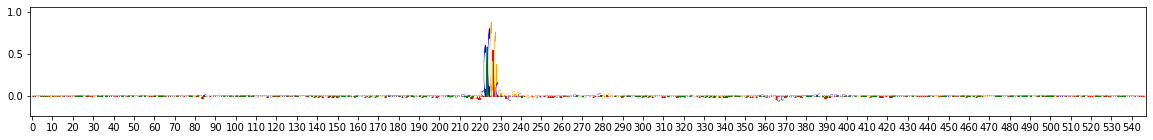

profile imp


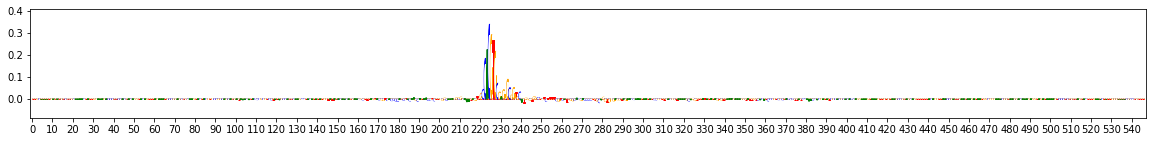

idx 239
Counts [320. 312.]
Predcounts [299.06012 305.52765]
oneovertemp 1.0
(200, 2)
Pred profile shape (200, 2)


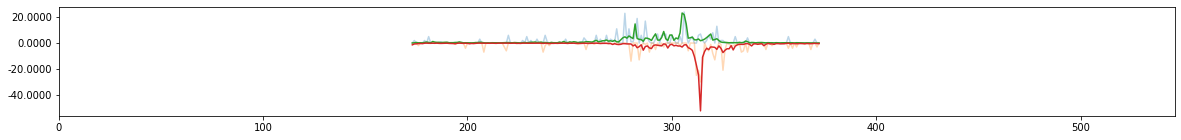

counts imp


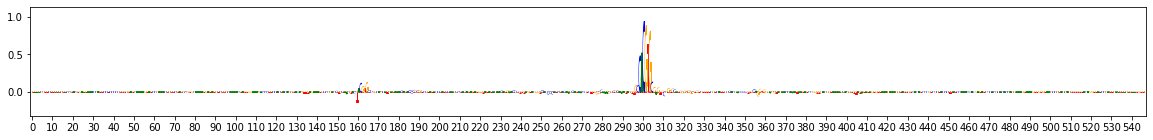

profile imp


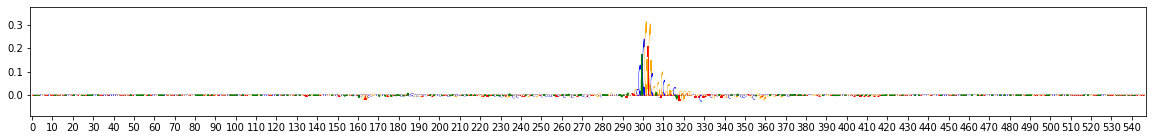

idx 661
Counts [299. 286.]
Predcounts [182.39928 178.76157]
oneovertemp 1.0
(200, 2)
Pred profile shape (200, 2)


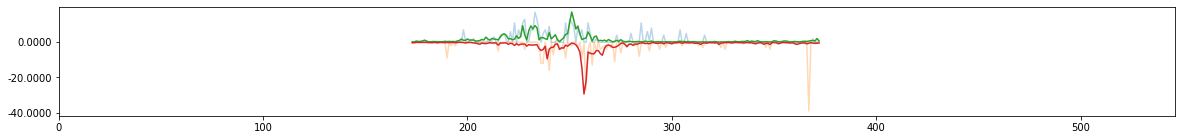

counts imp


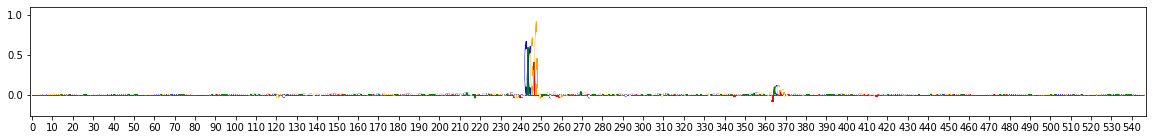

profile imp


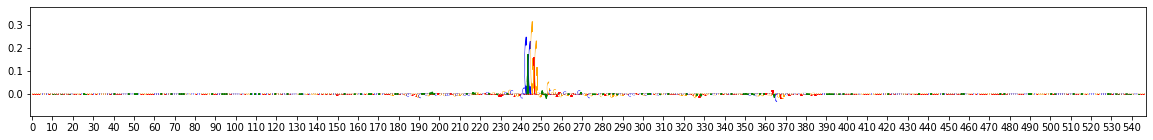

idx 660
Counts [331. 246.]
Predcounts [178.05852 167.15955]
oneovertemp 1.0
(200, 2)
Pred profile shape (200, 2)


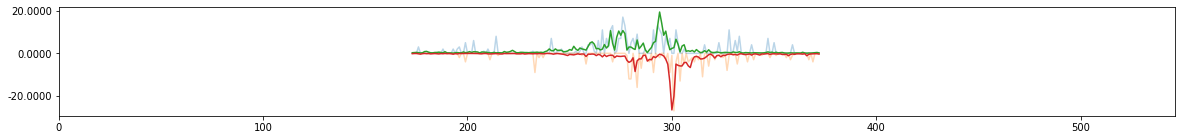

counts imp


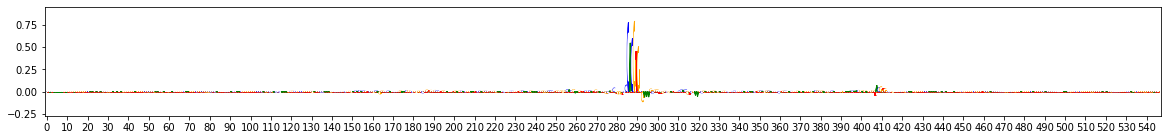

profile imp


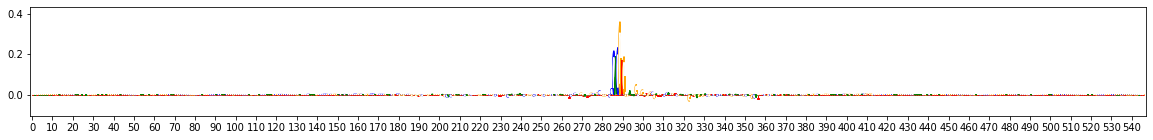

idx 342
Counts [366. 209.]
Predcounts [296.91306 305.7417 ]
oneovertemp 1.0
(200, 2)
Pred profile shape (200, 2)


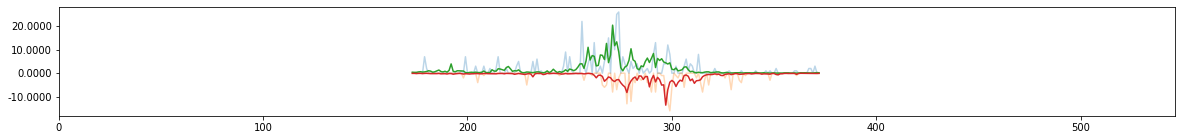

counts imp


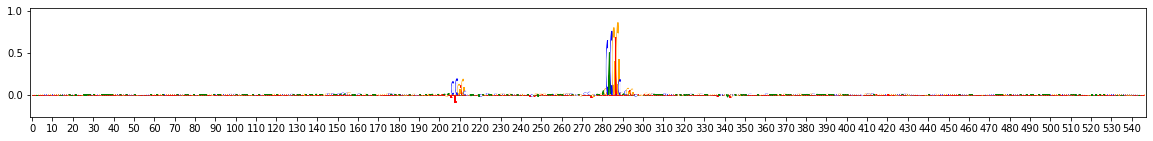

profile imp


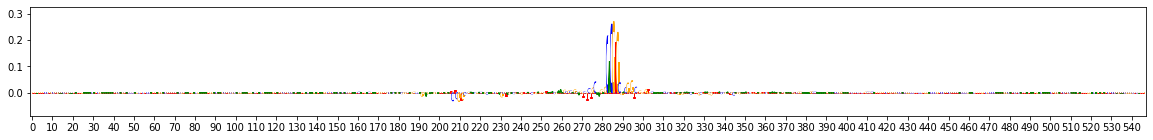

idx 341
Counts [364. 209.]
Predcounts [299.68716 305.37698]
oneovertemp 1.0
(200, 2)
Pred profile shape (200, 2)


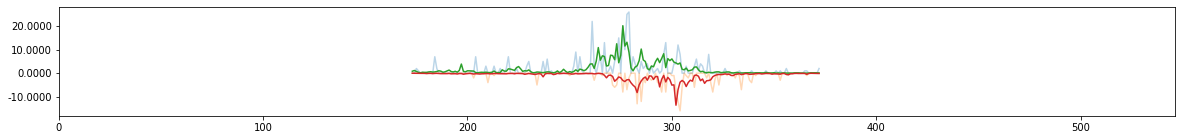

counts imp


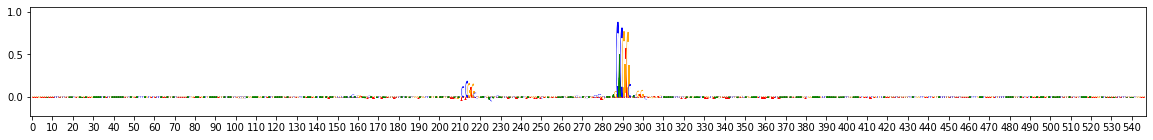

profile imp


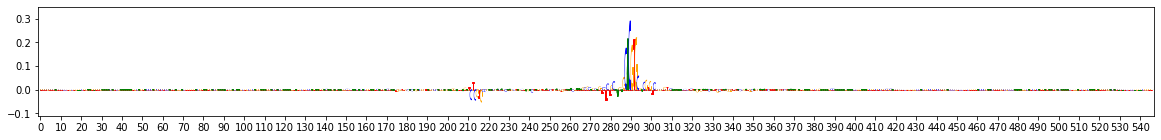

idx 171
Counts [277. 274.]
Predcounts [289.5657 391.3576]
oneovertemp 1.0
(200, 2)
Pred profile shape (200, 2)


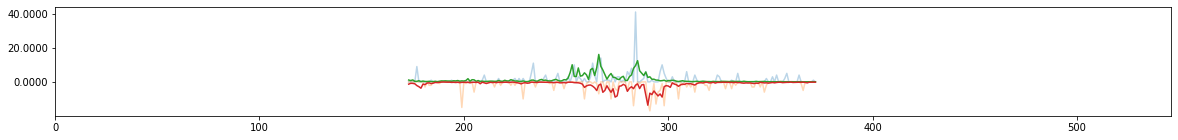

counts imp


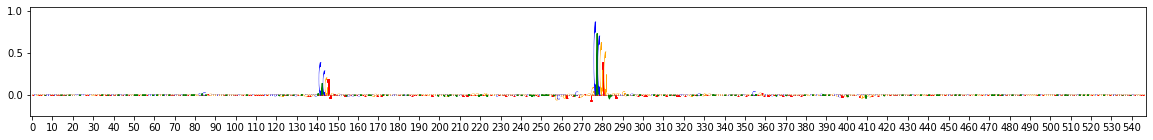

profile imp


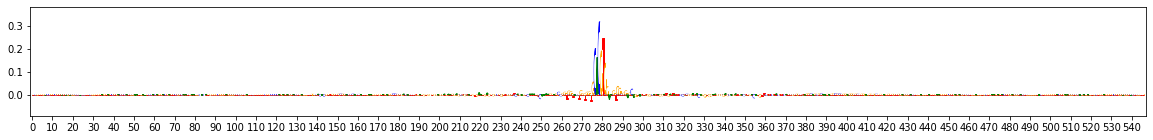

idx 172
Counts [268. 268.]
Predcounts [239.51624 311.35733]
oneovertemp 1.0
(200, 2)
Pred profile shape (200, 2)


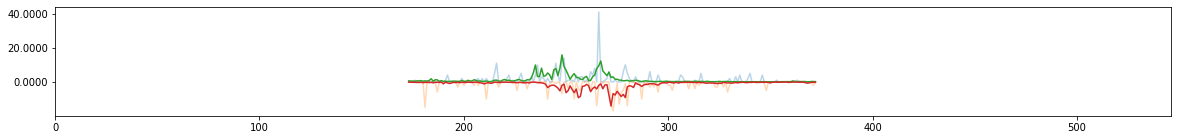

counts imp


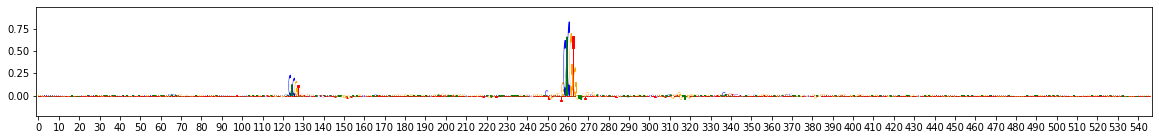

profile imp


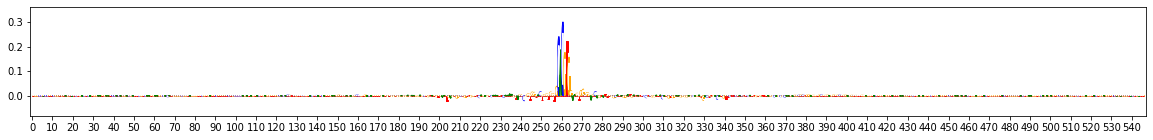

idx 74
Counts [276. 254.]
Predcounts [236.48993 246.7773 ]
oneovertemp 1.0
(200, 2)
Pred profile shape (200, 2)


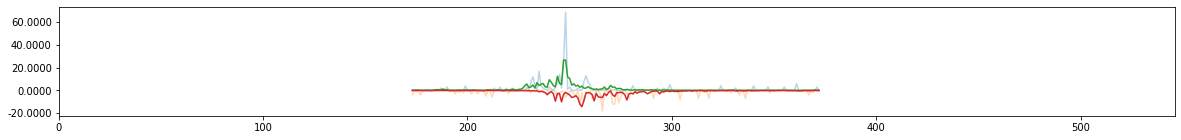

counts imp


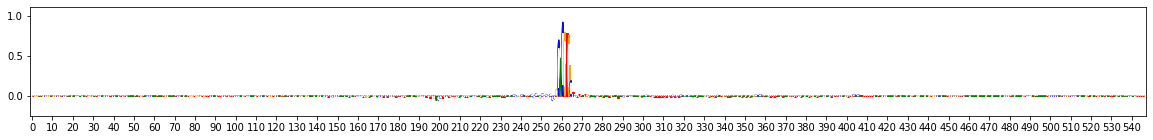

profile imp


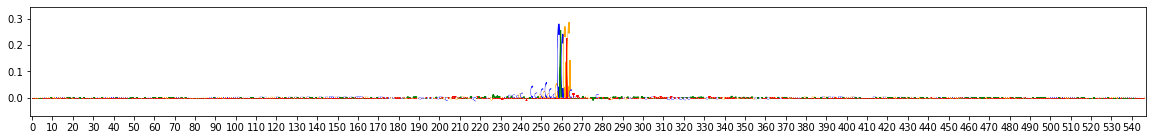

idx 73
Counts [273. 251.]
Predcounts [236.0827  247.72774]
oneovertemp 1.0
(200, 2)
Pred profile shape (200, 2)


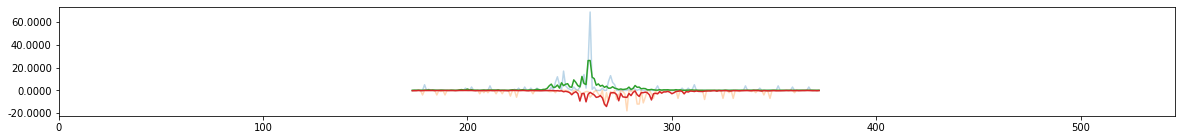

counts imp


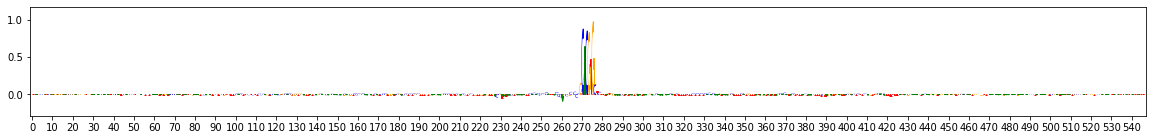

profile imp


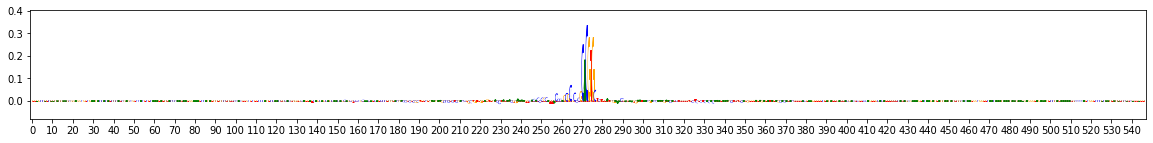

In [13]:
from deeplift.visualization import viz_sequence
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

sorted_test_indices = [x[0] for x in 
                       sorted(enumerate(o_test_labels_logtotalcount),
                              key=lambda x: -x[1])]

def smooth(vals):
  return np.convolve(vals, np.ones(1,)/1, mode='same')

for idx in sorted_test_indices[:10]: 
    true_profile = o_test_labels_profile[idx] 
    print("idx",idx)
    print("Counts",np.sum(true_profile,axis=0))
    print("Predcounts",np.exp(o_test_preds_logcount[idx])-1)
    
    for oneovertemp in [1.0]:
        print("oneovertemp",oneovertemp)
        print(o_test_labels_profile[idx].shape)
        print("Pred profile shape", o_test_preds_profile[idx].shape)
        pred_profile = (np.sum(o_test_labels_profile[idx], axis=0)[None,:] #total counts
                      *(np.exp(o_test_preds_profile[idx]*oneovertemp)/
                        np.sum(np.exp(o_test_preds_profile[idx]*oneovertemp),axis=0)[None,:]) )   
        plt.figure(figsize=(20,2))

        seq_len = 546
        out_pred_len = 200
        total_flanking = seq_len - out_pred_len
        left_flank = int(0.5*total_flanking)
        right_flank = total_flanking - left_flank
        plt.plot(np.arange(out_pred_len)+left_flank, smooth(true_profile[:,0]), alpha=0.3)
        plt.plot(np.arange(out_pred_len)+left_flank, -smooth(true_profile[:,1]), alpha=0.3)
        plt.plot(np.arange(out_pred_len)+left_flank, pred_profile[:,0])
        plt.plot(np.arange(out_pred_len)+left_flank, -pred_profile[:,1])
        plt.xlim(0,seq_len)
        plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
        plt.show()

    print("counts imp")
    viz_sequence.plot_weights(post_counts_actualimps[idx],
                            subticks_frequency=10)
    print("profile imp")
    viz_sequence.plot_weights(post_profile_actualimps[idx],
                            subticks_frequency=10)